# HR Analytics Project- Understanding the Attrition in HR

Description: In this dataset, classes are ordered, but it was not balanced. Dependent variable Attrition contains the two clasification Yes and No,  Yes is less then the no in dataset, These are the name of Features from the dataset -:
    
    
    
    Age
    Attrition
    BusinessTravel
    DailyRate	
    Department	
    DistanceFromHome	
    Education	
    EducationField	
    EmployeeCount	
    EmployeeNumber	
    EnvironmentSatisfaction	
    Gender	
    HourlyRate	
    JobInvolvement	
    JobLevel	
    JobRole	
    JobSatisfaction	
    MaritalStatus	
    MonthlyIncome	
    MonthlyRate	
    NumCompaniesWorked	
    Over18	
    OverTime	
    PercentSalaryHike	
    PerformanceRating	
    RelationshipSatisfaction	
    StandardHours	
    StockOptionLevel	
    TotalWorkingYears	
    TrainingTimesLastYear	
    WorkLifeBalance	
    YearsAtCompany	
    YearsInCurrentRole	
    YearsSinceLastPromotion	
    YearsWithCurrManager


In [2]:
#importing the libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')


In [3]:
#loading the data set
df= pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


Observation: Target variable in the dataset is Attrition , remaining all feature variables 

In [3]:
df.shape

(1470, 35)

Observation: Dataset contains the 1470 Rows and 35 columns

In [4]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Observation:
1. dataset contains interger and object data types 
2.  9 variables conatins object data type reaminintger data types and 1 float dataypes

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Observation: There is no null values in data set 

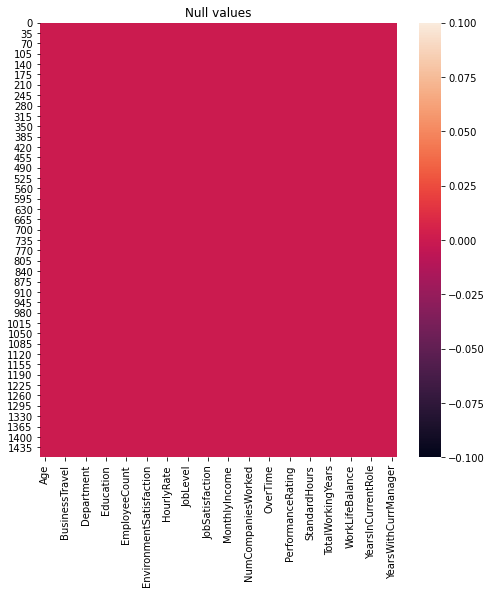

In [6]:
#Heat map to check the null values
plt.figure(figsize=[8,8])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

Observation: there is no null values in the data

In [7]:
#to check the classification in target variable
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

No     1233
Yes     237
Name: Attrition, dtype: int64


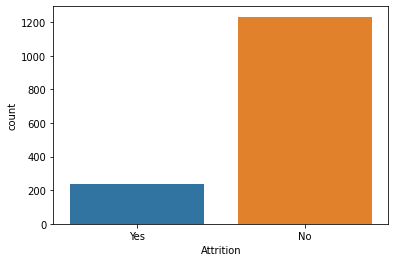

In [8]:
#univariate analysis
sns.countplot(df['Attrition'])
print(df['Attrition'].value_counts())
plt.show()

Observation :
1. No   :  1233
2. Yes  :  237
3. Classification "yes" is the less then the "No" values 
4. We can see clearly the dataset is imbalanced need to treat  

In [9]:
#df.describe()

No     1054
Yes     416
Name: OverTime, dtype: int64


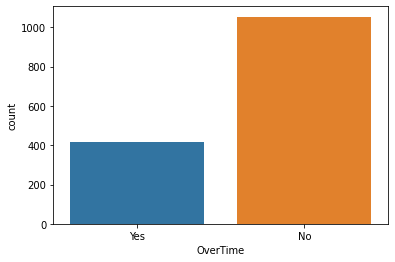

In [10]:
sns.countplot(df['OverTime'])
print(df['OverTime'].value_counts())
plt.show()

Observation: 
Observation :
1. No   :  1054
2. Yes  :  416
3. The most of the employees don't wants to work over time 


Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


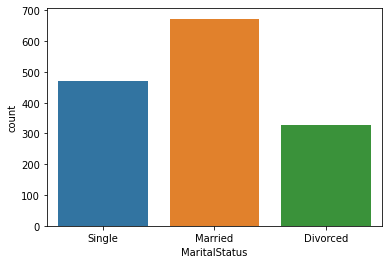

In [11]:
sns.countplot(df['MaritalStatus'])
print(df['MaritalStatus'].value_counts())
plt.show()

Observation: 
1. Married     673
2. Single      470
3. Divorced    327
3. Highest employees are married and second highest employees are single, in las divorced


In [12]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


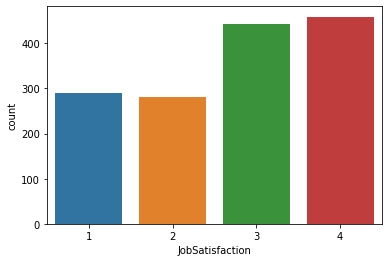

In [13]:
sns.countplot(df['JobSatisfaction'])
print(df['JobSatisfaction'].value_counts())
plt.show()

Observation:
1. 4    459
2. 3    442
3. 1    289
4. 2    280
5. The Highest number of people job satisfcation score is 4 and 3 

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


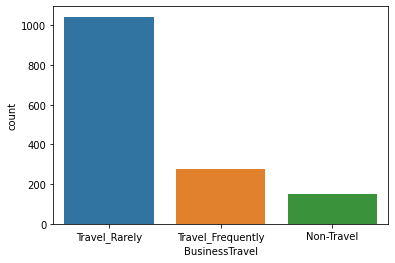

In [14]:
sns.countplot(df['BusinessTravel'])
print(df['BusinessTravel'].value_counts())
plt.show()

Observation:
1. Travel Rarely employees are more compare to the travel frequntely and Non travel employees

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


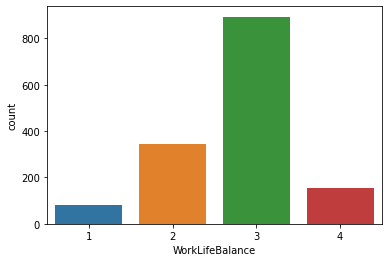

In [15]:
sns.countplot(df['WorkLifeBalance'])
print(df['WorkLifeBalance'].value_counts())
plt.show()

Observation: Work and life balance highest points is 3 only out of five  

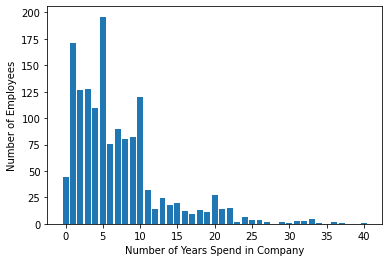

In [16]:
# number of years spent in the same company
no_of_years=df.groupby('YearsAtCompany').count()
plt.bar(no_of_years.index.values, no_of_years['EmployeeNumber'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

Observation:
1. Employee who wroks highest number of years works in same company is 5 

3    1244
4     226
Name: PerformanceRating, dtype: int64


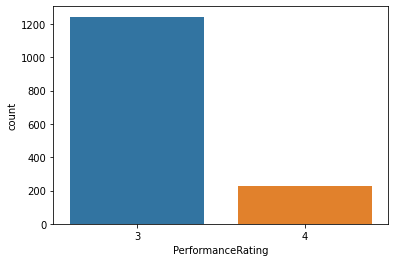

In [17]:
#PerformanceRating
sns.countplot(df['PerformanceRating'])
print(df['PerformanceRating'].value_counts())
plt.show()

Observation: Only Few Employee score performance rating is 4 out of 5 

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


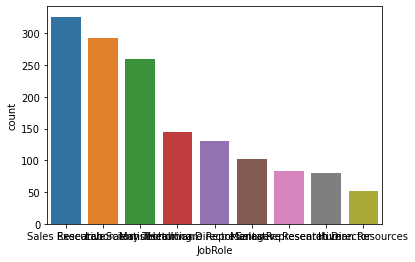

In [18]:
#JobRole

sns.countplot(df['JobRole'])
print(df['JobRole'].value_counts())
plt.show()

Observation:
1. Dataset contains the Highest number of job role is sales Executives and least is the  Human resources

In [19]:
#Selecting the object data types 

objDf = df.select_dtypes(include=['object']).copy()
objDf.head(2)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No


## Encoding the categorical vaiables using Label encoder

In [20]:
#Encoding the categorical vaiables using Label encoder

from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['Gender'] = le.fit_transform(df['Gender'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['Over18'] = le.fit_transform(df['Over18'])
df['OverTime'] = le.fit_transform(df['OverTime'])

In [21]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


In [22]:
# plot pairplot
#sns.pairplot(df)
#plt.show()

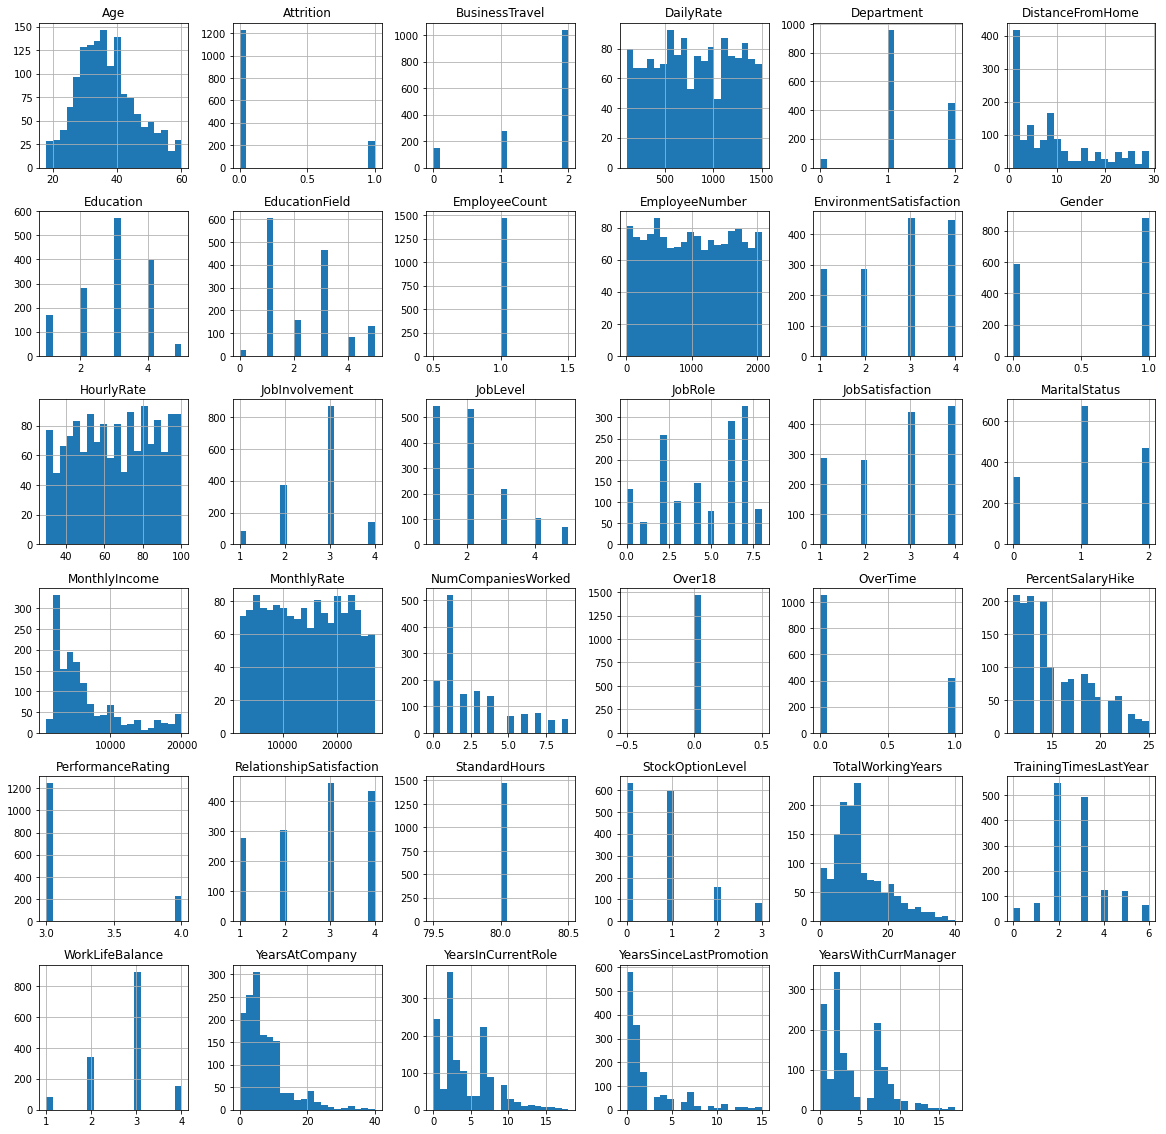

In [23]:
#plot histogram
df.hist(bins=20,figsize=(20,20))
plt.show()

Observation: most of the variables data is not distributed properly  Right skewed and and left skewed

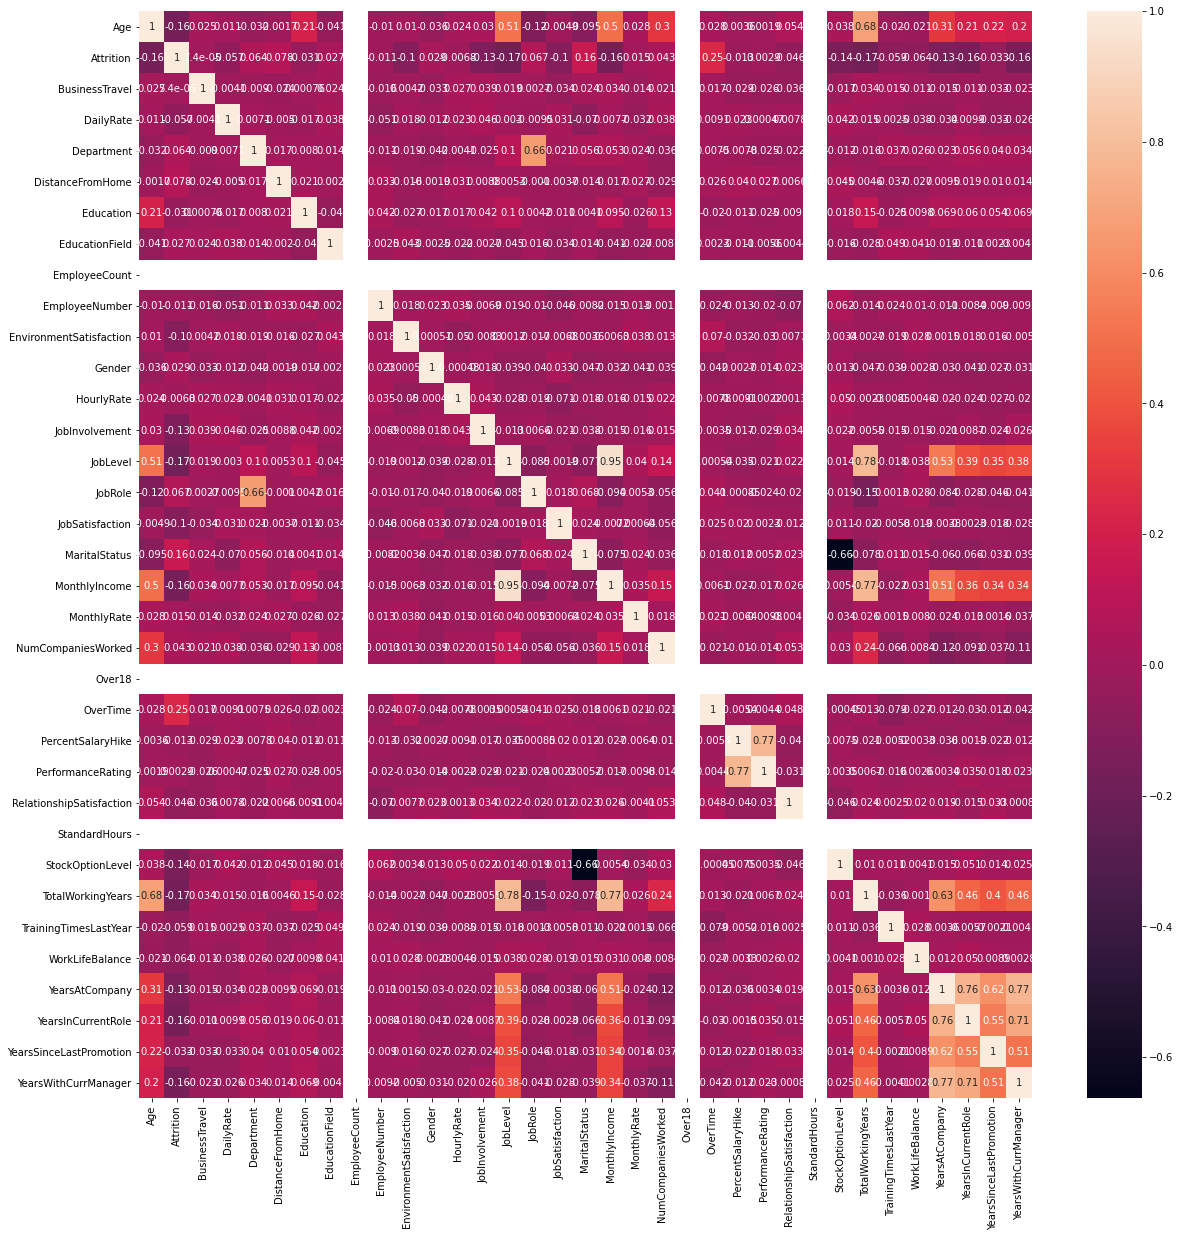

In [24]:
#To check the corr_mat  Heatmap
corr_hmap=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_hmap, annot=True)
plt.show()

Observation :
1.We not understood the corelation in this heat map due to the visibility of the heat map 

In [25]:
#to display the corealtion with the target variables 
corr_matrix=df.corr()
corr_matrix['Attrition'].sort_values(ascending = False)


Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

Observation:
1. Only 11 varialbes have positive corealtion with the target variables 
2. 3 variables  Employeecount, over18 and standardhour  not have any raltion with the target variables 
3. 20 Feature variables have negative relation with the target variables 

In [26]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

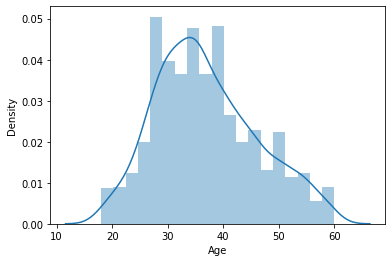

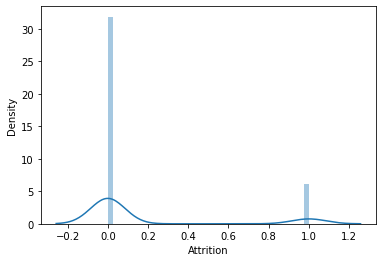

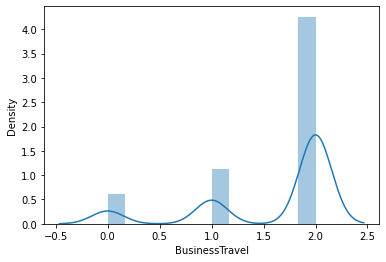

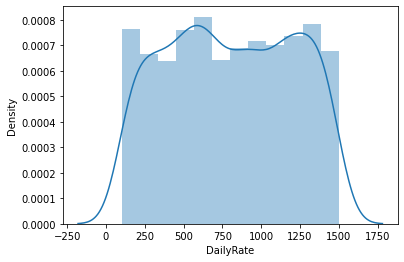

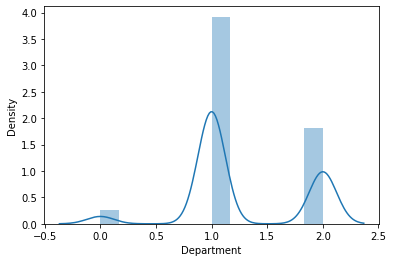

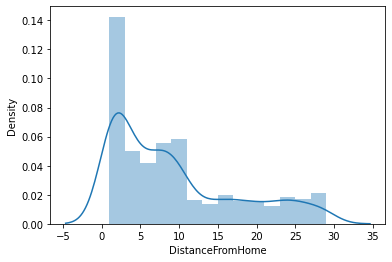

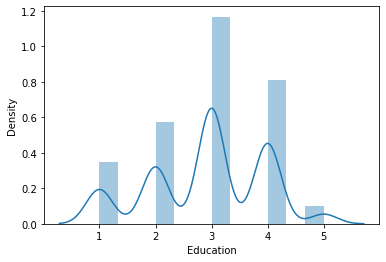

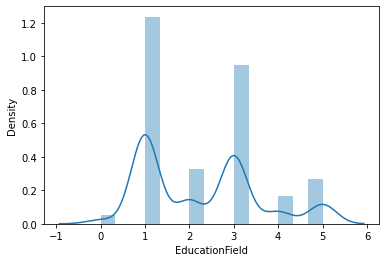

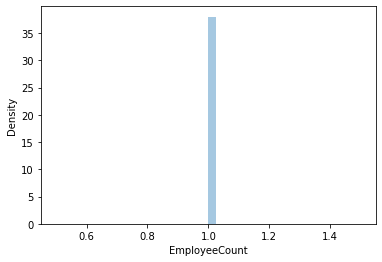

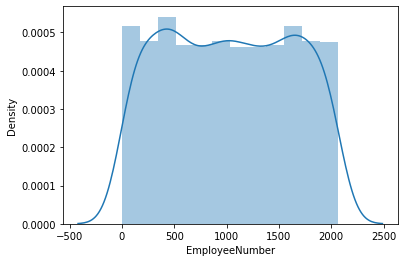

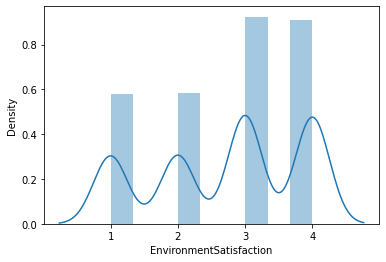

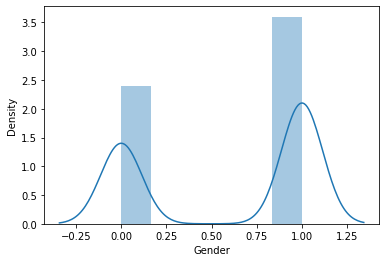

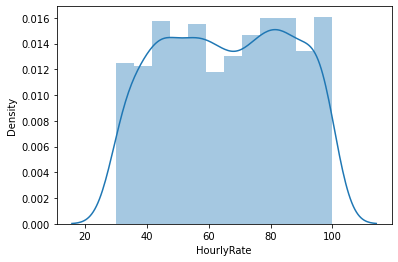

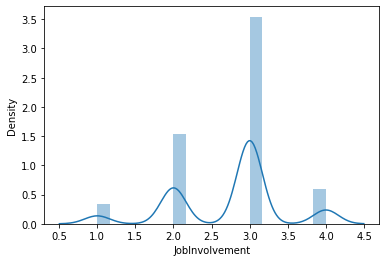

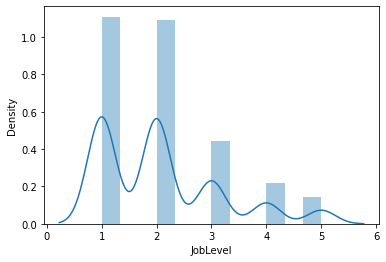

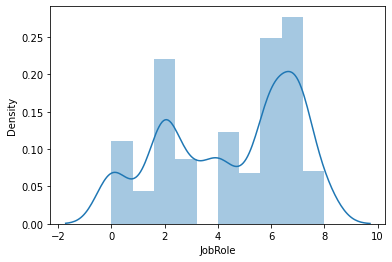

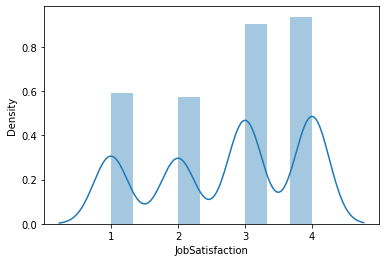

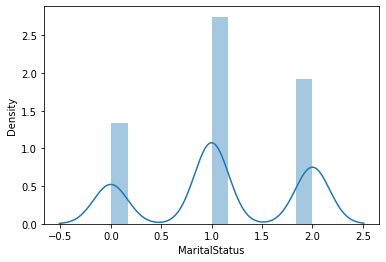

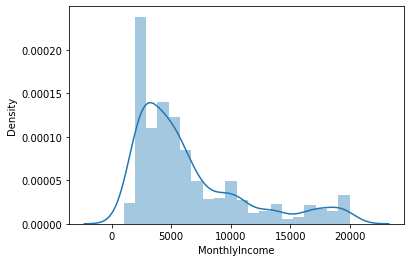

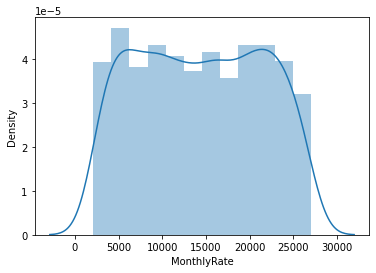

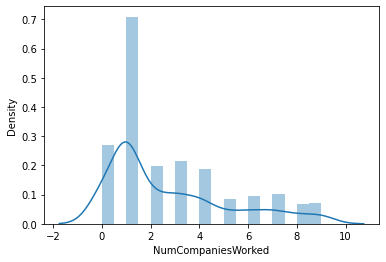

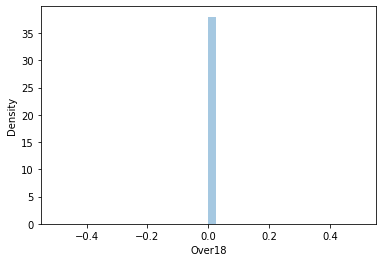

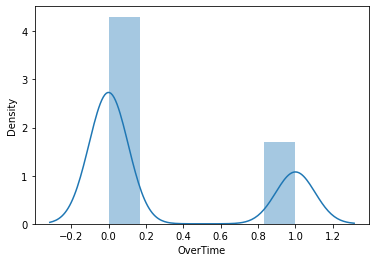

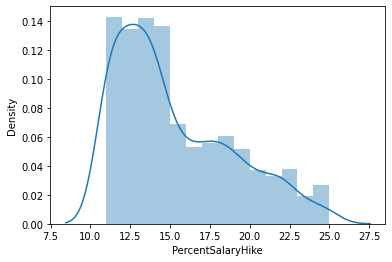

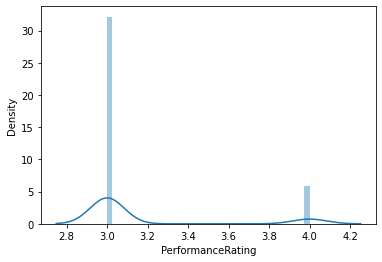

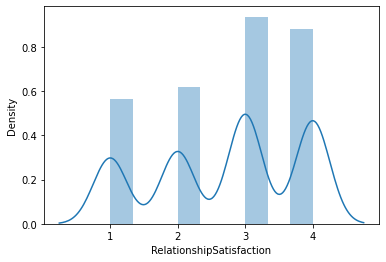

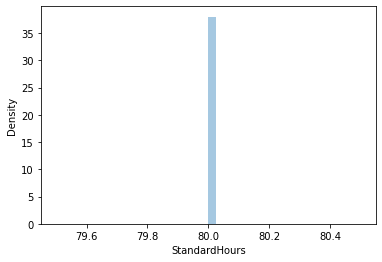

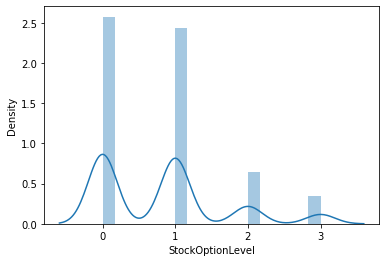

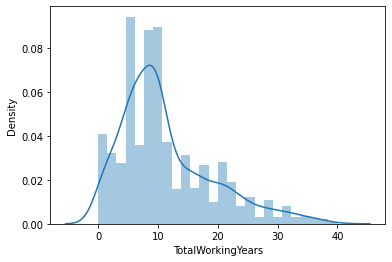

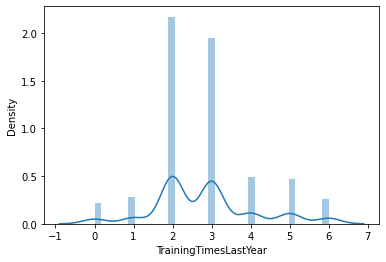

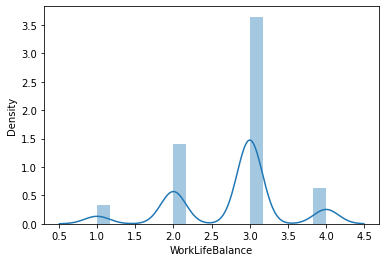

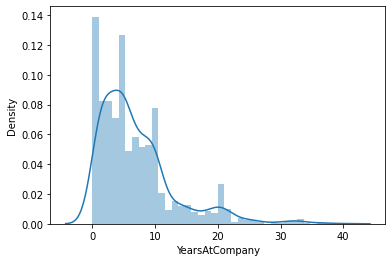

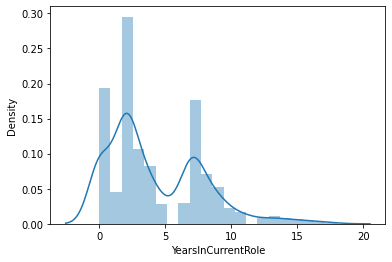

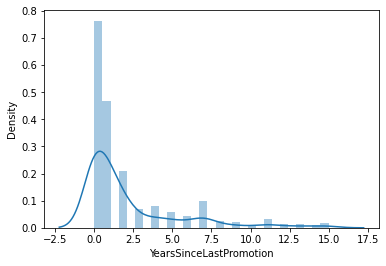

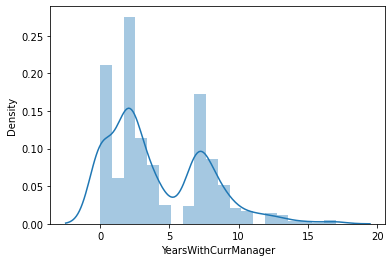

In [27]:
columns =['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
        
for i in df[columns]:
    plt.figure()
    sns.distplot(df[i])

Observation: Most of the varialbe are like clasification data is right skewed 

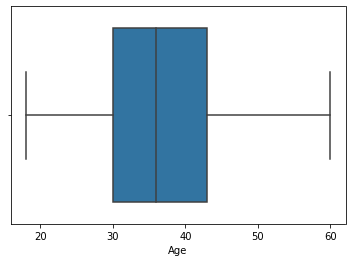

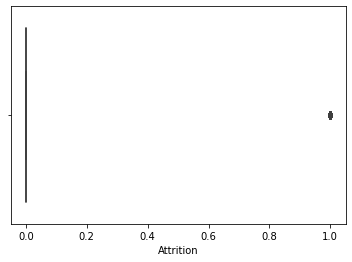

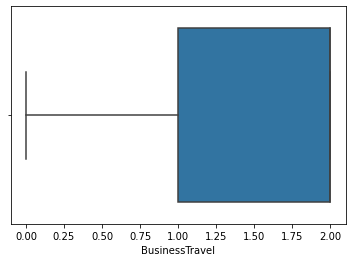

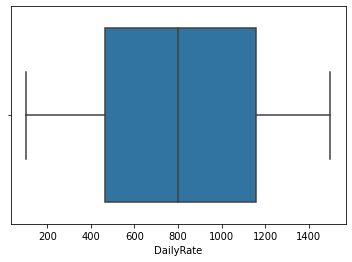

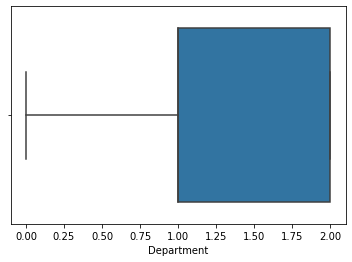

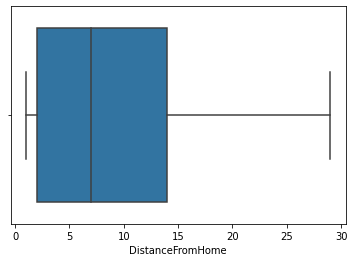

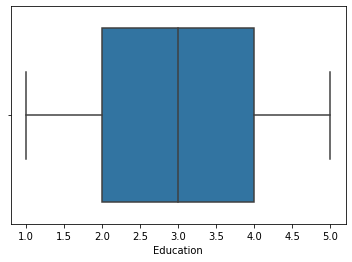

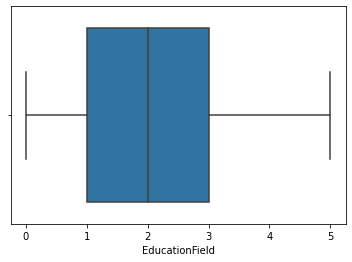

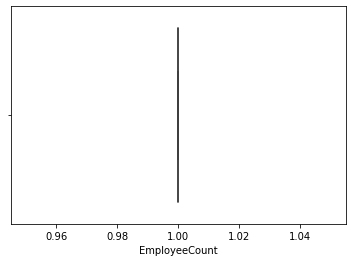

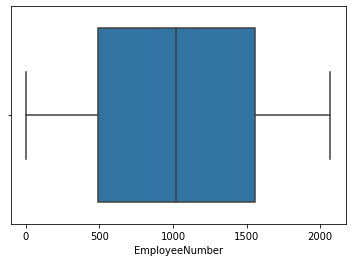

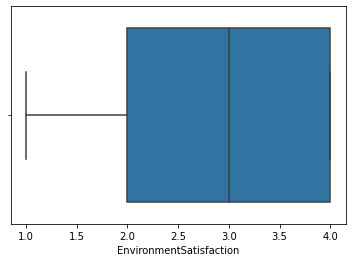

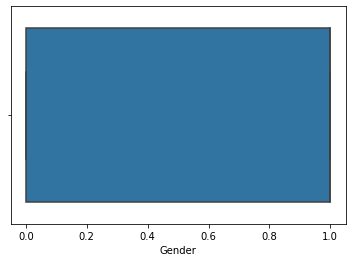

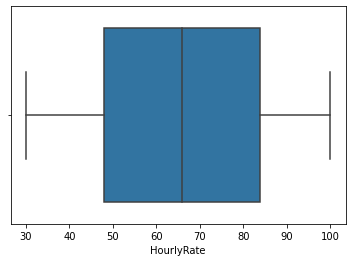

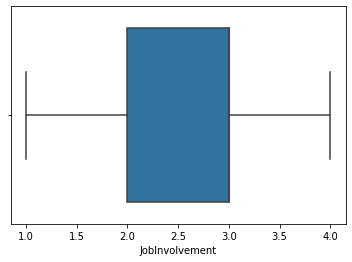

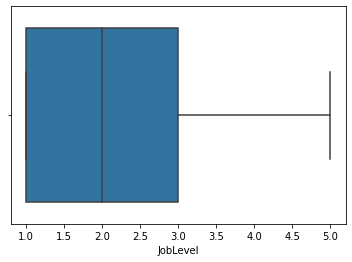

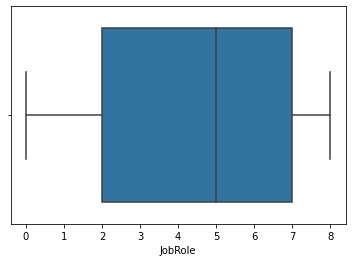

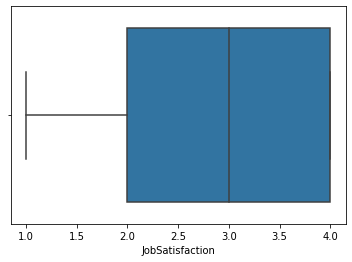

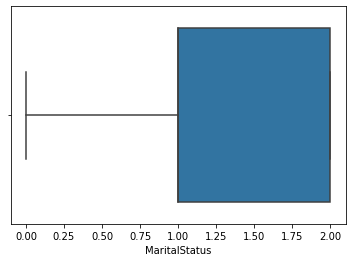

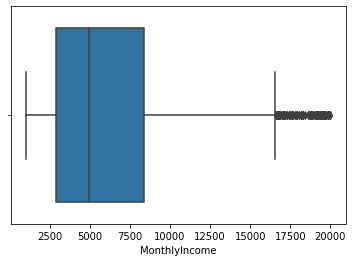

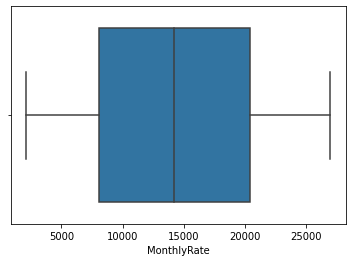

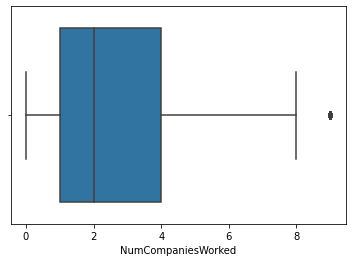

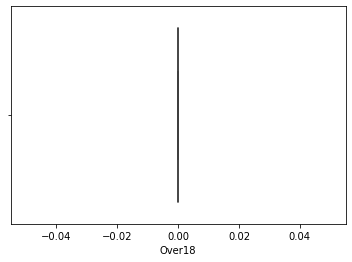

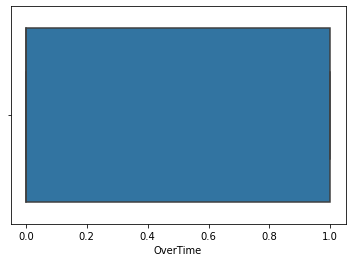

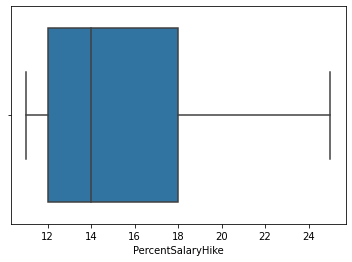

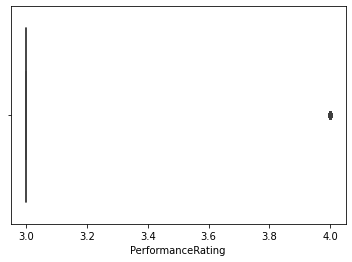

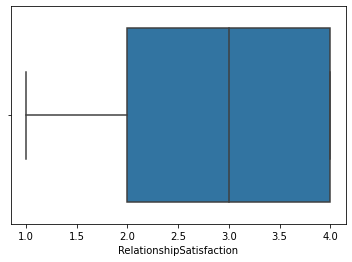

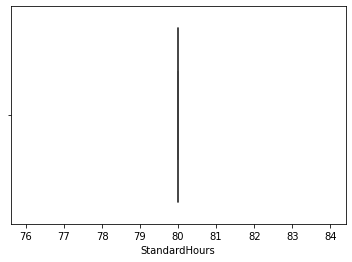

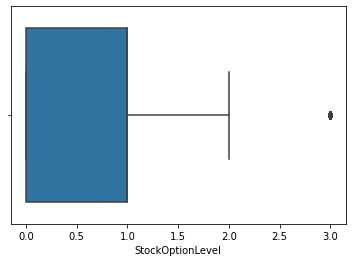

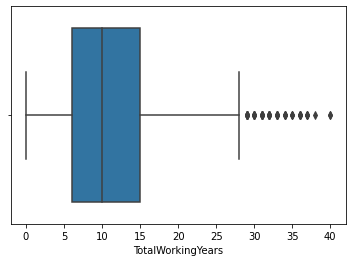

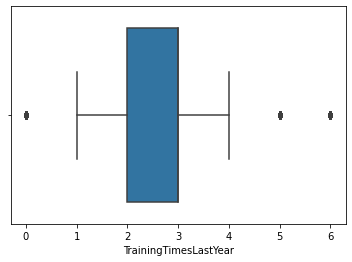

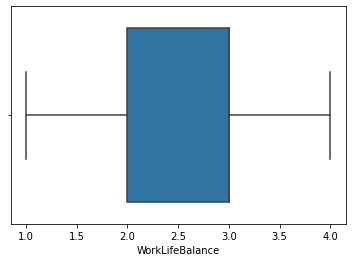

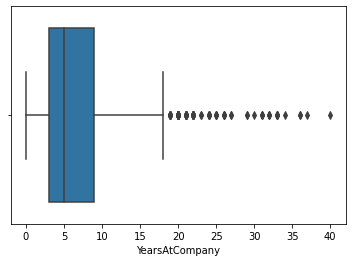

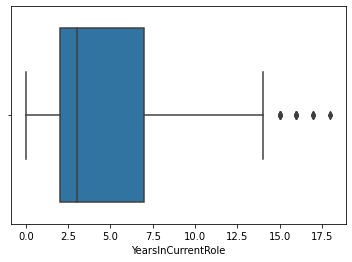

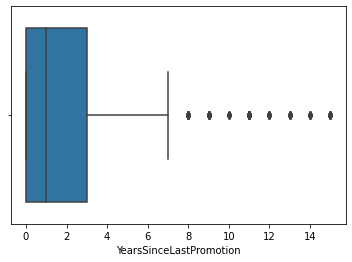

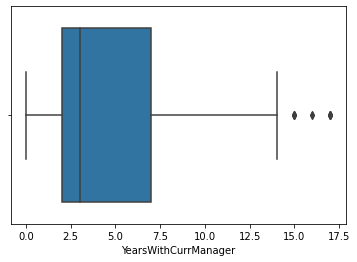

In [28]:
# with the help of box plot checking the outliers in data set 

for i in df[columns]:
    plt.figure()
    sns.boxplot(df[i])

Observation :
1. variables have Monthly income, years withCurrManger,YearSincelastPromotion, Yearsin Current Role, YearsAtCompany, trainingtime last years variables have the outliers

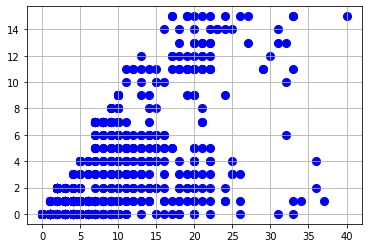

In [29]:
# plot data points
plt.scatter(df["YearsAtCompany"], df["YearsSinceLastPromotion"], color = "b", s = 65)
plt.grid()

Observation: we can see outlers in the data points

In [30]:
#Spliting the data into x and y set
x =df.drop(['Attrition'],axis=1)
y=df['Attrition']

In [31]:
# creating train test splits
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=40)

In [32]:
# import libraries
#NOrmalizing the data using minmax scaler
  
from sklearn.preprocessing import MinMaxScaler
# creating scaler scale var.
norm = MinMaxScaler()
# fit the scal
norm_fit = norm.fit(x_train)
# transfromation of trainig data
x_train = norm_fit.transform(x_train)
# transformation of testing data
x_test = norm_fit.transform(x_test)
print(x_train)

[[0.47619048 1.         0.70293486 ... 0.38888889 0.06666667 0.41176471]
 [0.5952381  1.         0.62992126 ... 0.55555556 0.2        0.52941176]
 [0.16666667 1.         0.8432355  ... 0.11111111 0.13333333 0.05882353]
 ...
 [0.28571429 1.         0.89906943 ... 0.         0.         0.        ]
 [0.85714286 1.         0.7480315  ... 0.11111111 0.         0.29411765]
 [0.21428571 1.         0.29277022 ... 0.38888889 0.         0.41176471]]


## finding the outliers in training dataset

In [33]:
#finding the outliers in training dataset
from sklearn.neighbors import LocalOutlierFactor
Find_out = LocalOutlierFactor()
outliers = Find_out.fit_predict(x_train)
outliers

array([1, 1, 1, ..., 1, 1, 1])

In [34]:
#selecting the row that not outliers 
no_outlier = outliers != -1
no_outlier

array([ True,  True,  True, ...,  True,  True,  True])

In [35]:
x_train, y_train = x_train[no_outlier, :], y_train[no_outlier]
#out lier removed from the training dataset

In [36]:

#checking the sahpe of the training dataset
print(x_train.shape, y_train.shape)

(1102, 34) (1102,)


Observation: After removing the outlier we got the 1102 rows  and 34 columns in training dataset 

## Treating the imbalanced data

In [37]:
#import library
from collections import Counter
from imblearn.over_sampling import SMOTE
counter =Counter(y_train)
print('Before', counter)

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x_train, y_train)

counter =Counter(y_smote)
print('after', counter)

Before Counter({0: 922, 1: 180})
after Counter({0: 922, 1: 922})


## decision Tree model 

In [38]:
#decision Tree model 
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
#dt.fit(x_smote,y_smote)   #over sampled data using here
dt.fit(x_train,y_train)
p=dt.predict(x_test)
print("We getting DecisionTree Model accuracy rate is ",accuracy_score(y_test,p))


We getting DecisionTree Model accuracy rate is  0.782608695652174


logistic regression 

In [39]:
#logistic regression 
#Model building
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
#lg.fit(x_smote,y_smote)   #minority class balanced data 
Model= lg.fit(x_train,y_train)
pred =lg.predict(x_test)
#print(pred)

In [40]:
print("Logistic regression Model accuracy_score", accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Logistic regression Model accuracy_score 0.8994565217391305
[[306   5]
 [ 32  25]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       311
           1       0.83      0.44      0.57        57

    accuracy                           0.90       368
   macro avg       0.87      0.71      0.76       368
weighted avg       0.89      0.90      0.89       368



Observation: 
1. We getting the Logistic regression Model accuracy_score 89.94


In [41]:
#AUC ROC CURVE

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score


In [42]:
y_pred_prob =lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.1490888 , 0.25055605, 0.1420068 , 0.63768455, 0.05658751,
       0.00540416, 0.09857669, 0.02559516, 0.16132128, 0.27200064,
       0.269432  , 0.58217687, 0.01139669, 0.5536762 , 0.59129976,
       0.10358045, 0.03918717, 0.59796928, 0.05956883, 0.14800367,
       0.20330329, 0.06141214, 0.44551415, 0.03489259, 0.03872399,
       0.0739724 , 0.4443582 , 0.05391943, 0.20696696, 0.20256534,
       0.06124676, 0.02744494, 0.30584826, 0.16313093, 0.28453598,
       0.75080891, 0.23065297, 0.18821696, 0.10610322, 0.03138983,
       0.07948747, 0.01531514, 0.22859151, 0.24312677, 0.08519074,
       0.08781699, 0.08557853, 0.1008453 , 0.22642349, 0.08221371,
       0.01591867, 0.02675565, 0.46835015, 0.14807444, 0.04252346,
       0.18176639, 0.01935572, 0.09601488, 0.00642649, 0.09597045,
       0.34635803, 0.08831056, 0.10613593, 0.10455549, 0.03119735,
       0.05132404, 0.21016254, 0.14470233, 0.03859548, 0.09300145,
       0.0466912 , 0.16582531, 0.02546124, 0.27501601, 0.14550

In [43]:
fpr,tpr,thresholds =roc_curve(y_test,y_pred_prob)

In [44]:
tpr

array([0.        , 0.01754386, 0.1754386 , 0.1754386 , 0.21052632,
       0.21052632, 0.35087719, 0.35087719, 0.36842105, 0.36842105,
       0.40350877, 0.40350877, 0.45614035, 0.45614035, 0.49122807,
       0.49122807, 0.52631579, 0.52631579, 0.54385965, 0.54385965,
       0.57894737, 0.57894737, 0.59649123, 0.59649123, 0.63157895,
       0.63157895, 0.64912281, 0.64912281, 0.66666667, 0.66666667,
       0.70175439, 0.70175439, 0.71929825, 0.71929825, 0.73684211,
       0.73684211, 0.75438596, 0.75438596, 0.77192982, 0.77192982,
       0.78947368, 0.78947368, 0.80701754, 0.80701754, 0.8245614 ,
       0.8245614 , 0.84210526, 0.84210526, 0.85964912, 0.85964912,
       0.87719298, 0.87719298, 0.89473684, 0.89473684, 0.9122807 ,
       0.9122807 , 0.92982456, 0.92982456, 0.94736842, 0.94736842,
       0.96491228, 0.96491228, 0.98245614, 0.98245614, 1.        ,
       1.        ])

In [45]:
thresholds

array([1.77999871, 0.77999871, 0.6806577 , 0.67662901, 0.63768455,
       0.6224931 , 0.55147348, 0.54233353, 0.53047294, 0.52026029,
       0.50848329, 0.50837563, 0.48917582, 0.48586228, 0.48277411,
       0.44551415, 0.42738096, 0.4010067 , 0.3957034 , 0.38429715,
       0.36192792, 0.2956755 , 0.29518551, 0.28624356, 0.2817707 ,
       0.27501601, 0.27200064, 0.27069611, 0.269432  , 0.25482934,
       0.24893649, 0.23065297, 0.23033281, 0.22502487, 0.2224332 ,
       0.22230429, 0.2197369 , 0.20959129, 0.20852371, 0.16773315,
       0.16582531, 0.16132128, 0.1612851 , 0.11520106, 0.11519166,
       0.1118317 , 0.11120712, 0.10610322, 0.10596658, 0.10358045,
       0.10217444, 0.09685194, 0.09601488, 0.08781699, 0.08747378,
       0.07948747, 0.07881733, 0.07453337, 0.07404847, 0.0132231 ,
       0.01278241, 0.0106592 , 0.01012873, 0.00540416, 0.00437806,
       0.00194212])

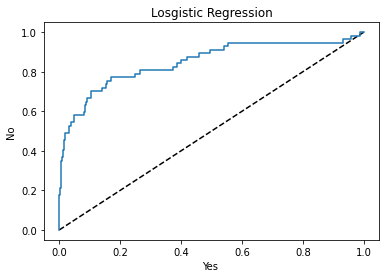

In [46]:

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('Yes ')
plt.ylabel('No ')
plt.title('Losgistic Regression')
plt.show()


In [47]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [48]:
print("We Getting the AUC score is  :",auc_score)

We Getting the AUC score is  : 0.711259660405032


In [49]:
#cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(dt, x,y, cv=5)
print(score)
print("Cross validation Mean of the score is  :",score.mean())


[0.78231293 0.7755102  0.81972789 0.78231293 0.78571429]
Cross validation Mean of the score is  : 0.7891156462585034


In [50]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.79 accuracy with a standard deviation of 0.02


## RandomForestClassifier model

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100)
#rf.fit(x_smote, y_smote)  #balanced data
rf.fit(x_train, y_train)
y_predict=rf.predict(x_test)
print('accuracy score', y_predict)
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

accuracy score [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0.8695652173913043
[[310   1]
 [ 47  10]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       311
           1       0.91      0.18      0.29        57

    accuracy                    

Observation:
1. We getting the RandomForest Model  accuracy rate 87.50% with out using the balanced data
2.We getting the RandomForest Model  accuracy rate 86.68% with using the balanced data

## SVM model 

In [52]:
#importing the svm model
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
#svclassifier.fit(x_train, y_train)
svclassifier.fit(x_smote, y_smote)  #balanced data
y_pred = svclassifier.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7907608695652174
[[247  64]
 [ 13  44]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.87       311
           1       0.41      0.77      0.53        57

    accuracy                           0.79       368
   macro avg       0.68      0.78      0.70       368
weighted avg       0.87      0.79      0.81       368




Observation:
1. We getting the SVM Model  accuracy rate 86.95 with out using the balanced data
2.We getting the SVM Model  accuracy rate 87.50 with using the balanced data

## Hyperparameter Tuning 

In [53]:
#Hyperparameter Tuning 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
lg = LogisticRegression()
  
# Instantiating the GridSearchCV object
lg_cv = GridSearchCV(lg, param_grid, cv = 5)
  
lg_cv.fit(x, y)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(lg_cv.best_params_)) 
print("Best score is {}".format(lg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 268.2695795279727}
Best score is 0.8421768707482993


Observation: 
We getting the Logestic regression Grid_Serch parameter tuning accuracy score is: 84.21 

#### Saving the Model
##### We getting highest accuracy in LogistRegression & RandomForest model

Logistic Regression model getting the highest accuarcy so we are saving the model

In [54]:
from sklearn.externals import joblib
  
# Save the model as a pickle in a file
joblib.dump(lg, 'lg.pkl')
  
# Load the model from the file
lg_joblib = joblib.load('lg.pkl') 
  
# Use the loaded model to make predictions
#lg_joblib.predict(x_test)
